# Movie Genre Classification ML Model

## 1. Import Libraries and Load Dataset

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import joblib
from flask import Flask, request, jsonify

# Load training data
train_data = pd.read_csv('train_data.txt', delimiter=':::', header=None, engine='python')
train_data.columns = ['ID', 'Title', 'Genre', 'Description']

train_data.head()


,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


## 2. Data  Preprocessing

In [2]:
# Import necessary libraries for preprocessing
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK data once
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocess text data function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Lemmatize and remove stopwords
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing to the 'Description' column
train_data['Description'] = train_data['Description'].apply(preprocess_text)

# Check the preprocessed data
train_data.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dhana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,listening conversation doctor parent 10yearold...
1,2,Cupid (1997),thriller,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,bus empty student field trip museum natural hi...
3,4,The Secret Sin (1915),drama,help unemployed father make end meet edith twi...
4,5,The Unrecovered (2007),drama,film title refers unrecovered body ground zero...


## 3. Split Data and Feature Extraction

In [7]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data['Description'], train_data['Genre'], test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)


## 4. Model Training and Evaluation

In [4]:
# Initialize and train the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Evaluate the model
y_val_pred = model.predict(X_val_tfidf)
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

print(f'Validation Accuracy: {accuracy}')
print(f'Validation Precision: {precision}')
print(f'Validation Recall: {recall}')
print(f'Validation F1 Score: {f1}')


c:\Users\dhana\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dhana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Accuracy: 0.5801899843216822
Validation Precision: 0.5551910510851272
Validation Recall: 0.5801899843216822
Validation F1 Score: 0.5415031918924018


## 5. Model Fine Tuning

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2']        # L2 regularization
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=2)

# Fit the model using GridSearchCV
grid_search.fit(X_train_tfidf, y_train)

# Print the best parameters and the best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

# Use the best estimator from grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_val_pred = best_model.predict(X_val_tfidf)

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

print(f'Validation Accuracy: {accuracy}')
print(f'Validation Precision: {precision}')
print(f'Validation Recall: {recall}')
print(f'Validation F1 Score: {f1}')


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'C': 10, 'penalty': 'l2'}
Best Score: 0.5371591222831041
Validation Accuracy: 0.5663561744904547
Validation Precision: 0.546172082665558
Validation Recall: 0.5663561744904547
Validation F1 Score: 0.5472868081793305


## 6. Save the trained model and vectorizer

In [8]:
# Save the trained model and vectorizer
joblib.dump(grid_search.best_estimator_, 'movie_genre_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

## 7. Load Test Data and Evaluate on Test Set

In [9]:
# Load test data
test_data = pd.read_csv('test_data.txt', delimiter=':::', header=None, engine='python')
test_data.columns = ['ID', 'Title', 'Description']
test_data['Description'] = test_data['Description'].apply(preprocess_text)

# Transform test data using the saved vectorizer
X_test_tfidf = vectorizer.transform(test_data['Description'])

# Load the test data solutions
test_data_solution = pd.read_csv('test_data_solution.txt', delimiter=':::', header=None, engine='python')
test_data_solution.columns = ['ID', 'Title', 'Genre', 'Description']

# Predict the genres for the test data
y_test_pred = grid_search.predict(X_test_tfidf)

# Evaluate the model on test data
y_test_true = test_data_solution['Genre']
accuracy_test = accuracy_score(y_test_true, y_test_pred)
precision_test = precision_score(y_test_true, y_test_pred, average='weighted')
recall_test = recall_score(y_test_true, y_test_pred, average='weighted')
f1_test = f1_score(y_test_true, y_test_pred, average='weighted')

print(f'Test Accuracy: {accuracy_test}')
print(f'Test Precision: {precision_test}')
print(f'Test Recall: {recall_test}')
print(f'Test F1 Score: {f1_test}')


Test Accuracy: 0.5600369003690037
Test Precision: 0.5355156819021447
Test Recall: 0.5600369003690037
Test F1 Score: 0.5398069945063599


## 8. Cofusion Matrix and Visualization

c:\Users\dhana\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\dhana\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\dhana\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.3.0 when using version 1.5.1. This might lead to b

Predicted Genre 1:  drama 
Predicted Genre 2:  drama 


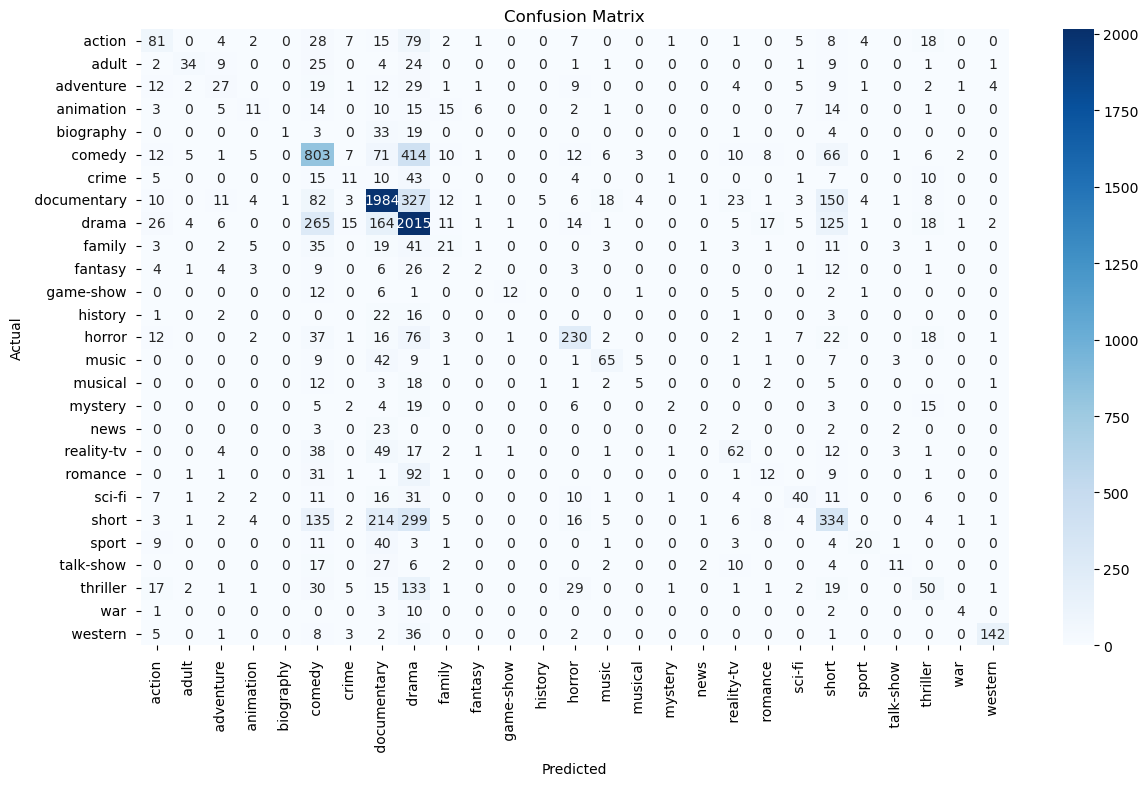

Classification Report:
                precision    recall  f1-score   support

      action        0.38      0.31      0.34       263
       adult        0.67      0.30      0.42       112
   adventure        0.33      0.19      0.24       139
   animation        0.28      0.11      0.15       104
   biography        0.50      0.02      0.03        61
      comedy        0.48      0.56      0.52      1443
       crime        0.19      0.10      0.13       107
 documentary        0.71      0.75      0.73      2659
       drama        0.53      0.75      0.62      2697
      family        0.23      0.14      0.17       150
     fantasy        0.13      0.03      0.04        74
   game-show        0.80      0.30      0.44        40
     history        0.00      0.00      0.00        45
      horror        0.65      0.53      0.59       431
       music        0.60      0.45      0.51       144
     musical        0.28      0.10      0.15        50
     mystery        0.29      0.04      

In [23]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the model and vectorizer
model = joblib.load('movie_genre_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Example function to predict genre
def predict_genre(synopsis):
    synopsis_tfidf = vectorizer.transform([synopsis])
    prediction = model.predict(synopsis_tfidf)
    return prediction[0]

# Example synopses
synopsis1 = "A young bookstore owner finds an old love letter hidden in a vintage book and sets out on a quest to find the author, discovering unexpected love and secrets along the way."
synopsis2 = "Two strangers meet on a train and discover an undeniable connection that changes their lives forever."

# Predict genres
print(f"Predicted Genre 1: {predict_genre(synopsis1)}")
print(f"Predicted Genre 2: {predict_genre(synopsis2)}")

# Function to plot confusion matrix and classification report
def plot_confusion_matrix_and_report(model, X, y):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(14, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    report = classification_report(y, y_pred)
    print("Classification Report:\n", report)


plot_confusion_matrix_and_report(model, X_val_tfidf, y_val)


In [1]:
# import joblib

# # Load the model and vectorizer
# model = joblib.load('movie_genre_model.pkl')
# vectorizer = joblib.load('tfidf_vectorizer.pkl')

# def predict_genre(synopsis):
#     synopsis_tfidf = vectorizer.transform([synopsis])
#     prediction = model.predict(synopsis_tfidf)
#     return prediction[0]

# # Interactive prediction
# synopsis = input("Enter the movie synopsis: ")
# predicted_genre = predict_genre(synopsis)
# print(f"Predicted Genre: {predicted_genre}")
